In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('data/train.csv', index_col='id')
test = pd.read_csv('data/test.csv', index_col='id')

In [5]:
train.shape, test.shape

((165034, 13), (110023, 12))

# Comparaison de la distribution du train et du test

In [6]:
# Je flag les dataset train et test pour ensuite les concat ensembles pour analyser l'ensemble complet des données qualitatives
train.insert(0,'origin','train')
test.insert(0,'origin','test')

In [7]:
data = pd.concat([train,test], axis=0)

In [8]:
# drop les columns qui ne semple pas utile pour la problématique
data.drop(columns=['CustomerId','Surname'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   origin           275057 non-null  object 
 1   CreditScore      275057 non-null  int64  
 2   Geography        275057 non-null  object 
 3   Gender           275057 non-null  object 
 4   Age              275057 non-null  float64
 5   Tenure           275057 non-null  int64  
 6   Balance          275057 non-null  float64
 7   NumOfProducts    275057 non-null  int64  
 8   HasCrCard        275057 non-null  float64
 9   IsActiveMember   275057 non-null  float64
 10  EstimatedSalary  275057 non-null  float64
 11  Exited           165034 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 27.3+ MB


## Qualitatives

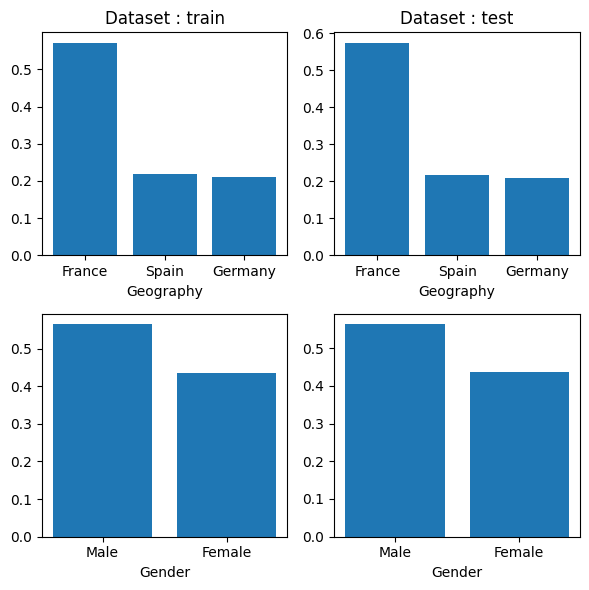

In [10]:
_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for x, origin in enumerate(data['origin'].unique()):
    axes[0,x].set_title(f'Dataset : {origin}') 
    for y, column in enumerate(data.select_dtypes('object').columns[1:]) :
        subset_data = data[data.origin == origin][column].value_counts(normalize=True)
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel(column)

plt.tight_layout()
plt.show()

Nous pouvons observer ci-dessus que notre échantillon train et test on la meme répartition pour les deux features catégorielles

## Quantitatives

# Analyse du churn en fonction des features

In [11]:
train.drop(columns=['origin','CustomerId','Surname'], inplace=True)

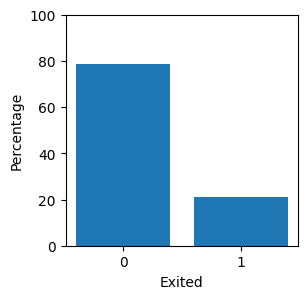

In [12]:
_ , axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
subset_data = train.Exited.value_counts(True)*100
axes.bar(subset_data.index, subset_data)
axes.set_xlabel('Exited')
axes.set_ylabel('Percentage')
axes.set_ylim(0, 100)
axes.set_xticks(subset_data.index)

plt.show()

target unbalanced

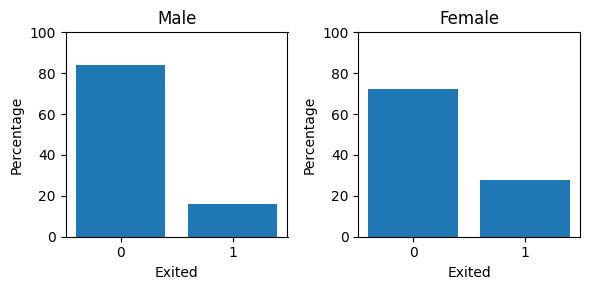

In [15]:
_ , axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for x, gender in enumerate(train.Gender.unique()) :
    axes[x].set_title(f'{gender}') 
    subset_data = train[train.Gender == gender].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

Plus de churn chez les femmes que les hommes

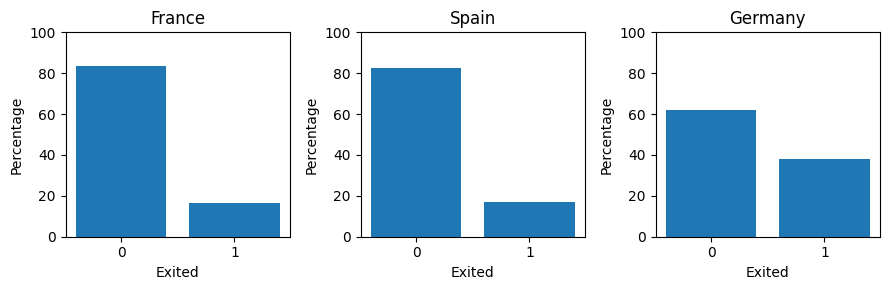

In [14]:
_ , axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for x, geography in enumerate(train.Geography.unique()) :
    axes[x].set_title(f'{geography}') 
    subset_data = train[train.Geography == geography].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

Plus de churn en Allemagne qu'en france ou Espagne